# Problem set 4: Analyzing data

In [ ]:
#!pip install git+https://github.com/elben10/pydst

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import pydst
dst = pydst.Dst(lang='en')

# Tasks

## Import national account data from Denmark Statistics

Consider the following dictionary definitions:

In [18]:
columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2010-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

In [19]:
# Look at the subjects
dst.get_subjects()

id                    desc  active  hasSubjects
0   1                  People    True         True
1   2       Labour and income    True         True
2   3                 Economy    True         True
3   4       Social conditions    True         True
4   5  Education and research    True         True
5   6                Business    True         True
6   7               Transport    True         True
7   8     Culture and leisure    True         True
8   9  Environment and energy    True         True
9  19                   Other    True         True

In [20]:
# See the IDs under Economy
dst.get_subjects(subjects='3')

id                                           desc  active  hasSubjects
0  3441                              National accounts    True         True
1  3445                     General government economy    True         True
2  3453    Balance of payments and international trade    True         True
3  3436                                    Price index    True         True
4  3438                                    Consumption    True         True
5  3439                               Property trading    True         True
6  3448  Exchange rates, interest rates and securities    True         True
7  3588                               Digital payments    True         True

In [21]:
# see the IDs under national accounts
dst.get_subjects(subjects='3441')

id                                         desc  active  hasSubjects
0  20515  Key figures for the national accounts (GDP)    True        False
1  20182                   Complete national accounts    True        False
2  20183                National accounts by industry    True        False
3  20184                  National accounts by sector    True        False
4  20517                  National accounts by region    True        False
5  20159                                 Productivity    True        False
6  20160                                 Input-output    True        False
7  20161                       Durable consumer goods   False        False
8  20827                 Historical national accounts    True        False

In [22]:
# See the tables under Complete national accounts
tables = dst.get_tables(subjects=['20182'])
tables.head()

id                                               text      unit  \
0   NAH1               0 Goods and services (full sequence)     M dkk   
1  NAHL2  1-2.1.1 Production, GDP and  generation of inc...     M Dkk   
2  NAHL4             5 Rest of the world (ROW) (main table)  Dkk mio.   
3   NKH1                               0 Goods and services     M dkk   
4  NKHO2  1-2.1.1 Production, GDP and  generation of inc...     M Dkk   

              updated firstPeriod latestPeriod  active  \
0 2022-02-28 08:00:00        1966         2021    True   
1 2022-02-28 08:00:00        1966         2021    True   
2 2022-02-28 08:00:00        1966         2021    True   
3 2022-02-28 08:00:00      1990Q1       2021Q4    True   
4 2022-02-28 08:00:00      1990Q1       2021Q4    True   

                                           variables  
0                    [transaction, price unit, time]  
1                    [transaction, price unit, time]  
2                                [transaction, time]  
3  [transaction, price unit, seasonal adjustment,...  
4  [transaction, price unit, seasonal adjustment,...

In [23]:
# Look at the variables in the data set
dst.get_variables(table_id = 'NAH1')

id         text  elimination   time  \
0   TRANSAKT  transaction        False  False   
1  PRISENHED   price unit        False  False   
2        Tid         time        False   True   

                                              values  
0  [{'id': 'P1D', 'text': 'P.1 Output'}, {'id': '...  
1  [{'id': 'V', 'text': 'Current prices'}, {'id':...  
2  [{'id': '1966', 'text': '1966'}, {'id': '1967'...

In [24]:
# Fetch the data
nah1_true = dst.get_data(table_id = 'NAH1', variables={'TRANSAKT':['*'], 'PRISENHED':['*'], 'TID':['*']})
nah1_true.head()

TRANSAKT                    PRISENHED  \
0                      D.21 Taxes on products  2010-prices, chained values   
1                      D.21 Taxes on products               Current prices   
2  D.21-D.31 Taxes less subsidies on products  2010-prices, chained values   
3  D.21-D.31 Taxes less subsidies on products               Current prices   
4                  D.31 Subsidies on products  2010-prices, chained values   

    TID INDHOLD  
0  1966   98704  
1  1966   10260  
2  1966   97473  
3  1966    8860  
4  1966    4458

**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [25]:
# Rename and replace
nah1_true.rename(columns=columns_dict,inplace=True)
df = nah1_true.copy()
nah1_true.head()

variable                         unit  \
0                      D.21 Taxes on products  2010-prices, chained values   
1                      D.21 Taxes on products               Current prices   
2  D.21-D.31 Taxes less subsidies on products  2010-prices, chained values   
3  D.21-D.31 Taxes less subsidies on products               Current prices   
4                  D.31 Subsidies on products  2010-prices, chained values   

   year  value  
0  1966  98704  
1  1966  10260  
2  1966  97473  
3  1966   8860  
4  1966   4458

In [26]:
# Replace data
for key,value in var_dict.items():
    nah1_true.variable.replace(key,value,inplace=True)

for key,value in unit_dict.items():
    nah1_true.unit.replace(key,value,inplace=True)
    
nah1_true.head()

variable     unit  year  value
0                      D.21 Taxes on products     real  1966  98704
1                      D.21 Taxes on products  nominal  1966  10260
2  D.21-D.31 Taxes less subsidies on products     real  1966  97473
3  D.21-D.31 Taxes less subsidies on products  nominal  1966   8860
4                  D.31 Subsidies on products     real  1966   4458

In [27]:
# Replace data using the .map() method
df['variable'] = df.variable.map(var_dict)
df['unit'] = df.unit.map(unit_dict)
df.head()

variable     unit  year  value
0      NaN     real  1966  98704
1      NaN  nominal  1966  10260
2      NaN     real  1966  97473
3      NaN  nominal  1966   8860
4      NaN     real  1966   4458

**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [29]:
# d. keep if in var_dict
I = False
for key,value in var_dict.items():
    I = I | (nah1_true.variable == value)
nah1_true = nah1_true[I]
nah1_true.head()

variable     unit  year    value
6         Y     real  1966  1089347
7         Y  nominal  1966   144582
22        C     real  1966   549491
23        C  nominal  1966    62576
24        G     real  1966   171307

In [30]:
# On the data we used the .map() all values not in the dict will be nan, so we can just delete those and its equivalent to above
df[df.variable.notna()].head()

variable     unit  year    value
6         Y     real  1966  1089347
7         Y  nominal  1966   144582
22        C     real  1966   549491
23        C  nominal  1966    62576
24        G     real  1966   171307

In [31]:
# e. convert values to numeric
nah1_true.value = nah1_true.value.astype('float')

**Step 4:** Discuss what the following summary statistics show.

In [32]:
# d. summary statistics
nah1_true.groupby(['variable','unit']).describe()

year                                                       \
                 count    mean        std     min      25%     50%      75%   
variable unit                                                                 
C        nominal  56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
         real     56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
G        nominal  56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
         real     56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
I        nominal  56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
         real     56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
M        nominal  56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
         real     56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
X        nominal  56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
         real     56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
Y        nominal  56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
         real     56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   

                         value                                         \
                     max count          mean           std        min   
variable unit                                                           
C        nominal  2021.0  56.0  7.863871e+05  5.170845e+05    62576.0   
         real     2021.0  56.0  1.059167e+06  2.800128e+05   549491.0   
G        nominal  2021.0  56.0  2.669649e+05  1.840796e+05    14768.0   
         real     2021.0  56.0  3.713118e+05  1.033736e+05   171307.0   
I        nominal  2021.0  56.0  2.297717e+05  1.588029e+05    21134.0   
         real     2021.0  56.0  2.776995e+05  1.094054e+05   127630.0   
M        nominal  2021.0  56.0  4.471831e+05  3.755400e+05    24406.0   
         real     2021.0  56.0  4.902101e+05  3.241494e+05   112171.0   
X        nominal  2021.0  56.0  5.027490e+05  4.284439e+05    23110.0   
         real     2021.0  56.0  5.700813e+05  3.647971e+05   123594.0   
Y        nominal  2021.0  56.0  1.828452e+06  1.281027e+06   144582.0   
         real     2021.0  56.0  2.338007e+06  8.267138e+05  1089347.0   

                                                                
                         25%        50%         75%        max  
variable unit                                                   
C        nominal   314858.00   722796.5  1263176.50  1742746.0  
         real      847042.50  1014769.5  1341092.00  1549423.0  
G        nominal   102028.25   238657.5   430446.25   612087.0  
         real      307787.75   351936.0   462233.25   540273.0  
I        nominal    79757.00   182014.5   352455.00   576732.0  
         real      183076.75   234810.0   354682.50   510947.0  
M        nominal   128332.75   293706.5   785699.50  1310530.0  
         real      212802.75   344339.5   792824.00  1160884.0  
X        nominal   124774.75   353569.5   863858.75  1478926.0  
         real      242032.00   457006.5   910779.50  1275598.0  
Y        nominal   661788.50  1553203.0  3025075.75  4406664.0  
         real     1609862.00  2159371.0  3140076.50  3811174.0

## Merge with population data from Denmark Statistics

Load population data from Denmark Statistics:

In [33]:
pop = dst.get_data(table_id = 'FT', variables={'HOVEDDELE':['*'], 'TID':['*']})
pop.rename(columns={'TID':'year','INDHOLD':'population'},inplace=True)
I = pop.HOVEDDELE == 'All Denmark'
pop =  pop.loc[I,['year','population']]
pop.head()

year  population
2  1834     1230964
3  1855     1507222
4  1890     2172380
5  1916     2921362
6  1935     3706349

**Question 1:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

In [35]:
# use pd.merge (remember you can use shift+tab to see the args)
merged_true = pd.merge(nah1_true,pop,how='left',on=['year'])
merged_true.tail(10)

variable     unit  year      value  population
662        C     real  2021  1549423.0   5840045.0
663        C  nominal  2021  1742746.0   5840045.0
664        G     real  2021   540273.0   5840045.0
665        G  nominal  2021   612087.0   5840045.0
666        I     real  2021   510947.0   5840045.0
667        I  nominal  2021   576732.0   5840045.0
668        X     real  2021  1275485.0   5840045.0
669        X  nominal  2021  1478926.0   5840045.0
670        M     real  2021  1160884.0   5840045.0
671        M  nominal  2021  1310530.0   5840045.0

**Question 2:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

In [36]:
pop_with_index = pop.set_index('year')
pop_with_index.rename(columns={'population':'population_alt'},inplace=True)
merged_true_with_index = merged_true.set_index('year')
merged_true_alt = merged_true_with_index.join(pop_with_index)
merged_true_alt.tail(10)

variable     unit      value  population  population_alt
year                                                         
2021        C     real  1549423.0   5840045.0       5840045.0
2021        C  nominal  1742746.0   5840045.0       5840045.0
2021        G     real   540273.0   5840045.0       5840045.0
2021        G  nominal   612087.0   5840045.0       5840045.0
2021        I     real   510947.0   5840045.0       5840045.0
2021        I  nominal   576732.0   5840045.0       5840045.0
2021        X     real  1275485.0   5840045.0       5840045.0
2021        X  nominal  1478926.0   5840045.0       5840045.0
2021        M     real  1160884.0   5840045.0       5840045.0
2021        M  nominal  1310530.0   5840045.0       5840045.0

## Split-apply-combine-(plot)

Consider the following **split-apply-combine-plot:**

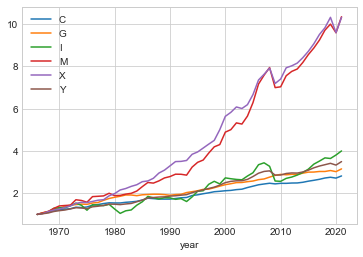

In [37]:
# a. split
nah1_true_grouped = nah1_true.groupby(['variable','unit'])
nah1_true_grouped_first = nah1_true_grouped.value.first()
nah1_true_grouped_first.name = 'first'

# b. apply
nah1_true.set_index(['variable','unit','year'],inplace=True)
nah1_true = nah1_true.join(nah1_true_grouped_first,how='left',on=['variable','unit'])
nah1_true.reset_index(inplace=True)

# c. combine
nah1_true['indexed'] = nah1_true['value']/nah1_true['first']

# d. plot
def plot(df):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])['indexed'].plot(legend=True);
    
plot(nah1_true)

In [38]:
nah1_true.head()

variable     unit  year      value      first  indexed
0        Y     real  1966  1089347.0  1089347.0      1.0
1        Y  nominal  1966   144582.0   144582.0      1.0
2        C     real  1966   549491.0   549491.0      1.0
3        C  nominal  1966    62576.0    62576.0      1.0
4        G     real  1966   171307.0   171307.0      1.0

**Question** Implement the same split-apply-combine as above using `transform`.

In [39]:
def first(x): # select the first element in a series
    return x.iloc[0]

nah1_true_alt = nah1_true.copy()
grouped = nah1_true_alt.groupby(['variable','unit'])
nah1_true_alt['index_transform'] = grouped['value'].transform(lambda x: x/first(x))
nah1_true_alt.head()

variable     unit  year      value      first  indexed  index_transform
0        Y     real  1966  1089347.0  1089347.0      1.0              1.0
1        Y  nominal  1966   144582.0   144582.0      1.0              1.0
2        C     real  1966   549491.0   549491.0      1.0              1.0
3        C  nominal  1966    62576.0    62576.0      1.0              1.0
4        G     real  1966   171307.0   171307.0      1.0              1.0

# Problem: The Housing market


## Housing data

**Note:** The file `data/bm010_parcel.xlsx` has been downloaded from http://rkr.statistikbank.dk/201.

**Question:** Go through the cell below and ensure you understand ALL commands.

In [ ]:
# a. load data
prices = pd.read_excel('data/bm010_parcel.xlsx', skiprows=2)
prices.rename(columns={'Unnamed: 2': 'municipality'}, inplace=True)

# b. delete columns
del prices['Unnamed: 0']
del prices['Unnamed: 1']

# c. rename time columns: 1992K1 -> price19921
time_dict = {} 
for y in range(1992,2018+1): 
    for k in range(1,4+1): 
        str_from = f'{y}K{k}'
        str_to   = f'price{y}{k}'
        time_dict[str_from] = str_to
prices = prices.rename(columns = time_dict)        

# d. drop missing
prices = prices.dropna()

# e. convert to long
prices_long = pd.wide_to_long(prices, stubnames='price', i='municipality', j='year_quarter')
prices_long.reset_index(inplace=True)

# f. drop missing and convert to float
I = prices_long.loc[prices_long.price == '..']
prices_long.drop(I.index, inplace=True)
prices_long.price = prices_long.price.astype('float')

# g. create date variable
prices_long['d'] = (prices_long.year_quarter.astype(str).str[:4] # grab the year, first four digits
          + 'Q' # add the letter Q 
          + prices_long.year_quarter.astype(str).str[4]) # the quarter (fifth digit)
prices_long['date'] = pd.to_datetime(prices_long.d)

# h. cleanup 
del prices_long['year_quarter']
del prices_long['d']

prices_long.head()

## Population data

**Question:** Go through the cell below and ensure you understand ALL commands.

In [ ]:
# a. load data
pop = dst.get_data(table_id='FOLK1A', variables={'Alder':['IALT'], 'CIVILSTAND':['TOT'], 'Køn':['TOT'], 'Tid':['*'], 'OMRÅDE':['*']})

# b. drop and rename columns
for v in ['ALDER', 'CIVILSTAND', 'KØN']: 
    del pop[v]
pop = pop.rename(columns = {'INDHOLD':'population', 'OMRÅDE': 'municipality'})

# c. drop non-municipalities
for val in ['Region', 'All']: 
    I = pop['municipality'].str.contains(val)
    pop.drop(pop[I].index, inplace=True)

# d. convert to date
pop['date'] = pd.to_datetime(pop.TID)
del pop['TID']

pop.head()

## Analysis

**Problem:** Analyze the co-variation betwen population growth and house price growth. Reproduce the graphs below. 

**Hint:** For the second one consider the `agg` method (similar to but different from `transform`, Google it).

In [ ]:
# write your code here 

**Answer:**

In [ ]:
# a. merge
full = pd.merge(pop, prices_long, on=['date','municipality'], how='left')
full.sort_values(['municipality','date'], inplace=True)

# b. take logs
full['log_population'] =  np.log(full['population'])
full['log_price'] =  np.log(full['price'])

# c. figur 1: log differences
ax = full.groupby('municipality').diff(1).plot(x = 'log_population', y = 'log_price', kind = 'scatter'); 
ax.set_xlabel('log difference in population') 
ax.set_ylabel('log difference in price')

# c. figur 2: mean log differences
ax = full.groupby('municipality').agg(lambda x: np.mean(x.diff())).plot(x = 'log_population', y = 'log_price', kind = 'scatter'); 
ax.set_xlabel('within-municipality mean log difference in population')
ax.set_ylabel('within-municipality mean log difference in price'); 